In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_data=pd.read_csv('data/train.csv').as_matrix()
test_data=pd.read_csv('data/test.csv').as_matrix()

C:\Users\Avinash.Singh26\AppData\Local\Continuum\miniconda3\envs\pacman\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Avinash.Singh26\AppData\Local\Continuum\miniconda3\envs\pacman\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
(train_Y,train_X)=train_data[:,0],train_data[:,1:]
test_X=test_data[:,0:]
print(train_X.shape,test_X.shape,train_Y.shape,test_Y.shape)

(42000, 784) (28000, 784) (42000,) (28000,)


In [6]:
train_X=np.reshape(train_X,(-1,28,28))#reshaping 784 into 28x28
test_X=np.reshape(test_X,(-1,28,28))#reshaping 784 into 28x28

In [7]:
print("Training data shape: ",train_X.shape)
print("Testing data shape : ",test_X.shape)

Training data shape:  (42000, 28, 28)
Testing data shape :  (28000, 28, 28)


In [9]:
classes=np.unique(train_Y)
num_Classes=len(classes)
print(" The classes are : ",classes)
print("Number of classes are : ",num_Classes )

 The classes are :  [0 1 2 3 4 5 6 7 8 9]
Number of classes are :  10


Text(0.5,1,'Value for this number is : 8')

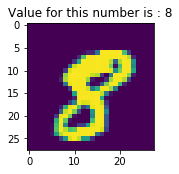

In [10]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[10,:,:])
plt.title("Value for this number is : {}".format(train_Y[10]))

# Preprocessing

In [11]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
train_X=train_X.astype('float32')#Converting to float
test_X=test_X.astype('float32')
train_X=train_X/255.#Normalization
test_X=test_X/255.

# One Hot Encoding

In [12]:
train_y_one_hot=to_categorical(train_Y)#this function converts it into one hot vector

In [13]:
print("Before One hot encoding : ",train_Y[2])
print("AFter One hot encoding : ",train_y_one_hot[2])

Before One hot encoding :  1
AFter One hot encoding :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_y_one_hot,test_size=0.2,random_state=13)
batch_size=64
epochs=30
num_classes=10

In [15]:
num_model=Sequential()
num_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
num_model.add(LeakyReLU(alpha=0.1))
num_model.add(MaxPooling2D((2, 2),padding='same'))
num_model.add(Dropout(0.25))
num_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
num_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
num_model.add(LeakyReLU(alpha=0.1))                  
num_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
num_model.add(Dropout(0.25))
num_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
num_model.add(LeakyReLU(alpha=0.1))
num_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
num_model.add(Dropout(0.25))
num_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
num_model.add(LeakyReLU(alpha=0.1))
num_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
num_model.add(Dropout(0.25))
num_model.add(Flatten())
num_model.add(Dense(256,activation='linear'))
num_model.add(LeakyReLU(alpha=0.1))
num_model.add(Dense(num_classes,activation='softmax'))

In [ ]:
num_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
num_model_train=num_model.fit(train_X,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=
                                (valid_X,valid_label))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 216s 6ms/step - loss: 0.3519 - acc: 0.8825 - val_loss: 0.0947 - val_acc: 0.9729
Epoch 2/30
33600/33600 [==============================] - 212s 6ms/step - loss: 0.0987 - acc: 0.9698 - val_loss: 0.0741 - val_acc: 0.9801
Epoch 3/30
33600/33600 [==============================] - 212s 6ms/step - loss: 0.0757 - acc: 0.9767 - val_loss: 0.0551 - val_acc: 0.9862
Epoch 4/30
33600/33600 [==============================] - 213s 6ms/step - loss: 0.0634 - acc: 0.9808 - val_loss: 0.0583 - val_acc: 0.9840
Epoch 5/30
33600/33600 [==============================] - 214s 6ms/step - loss: 0.0573 - acc: 0.9825 - val_loss: 0.0444 - val_acc: 0.9876
Epoch 6/30
33600/33600 [==============================] - 213s 6ms/step - loss: 0.0544 - acc: 0.9836 - val_loss: 0.0561 - val_acc: 0.9844
Epoch 7/30
33600/33600 [==============================] - 213s 6ms/step - loss: 0.0475 - acc: 0.9860 - val_loss: 0.0626 - v

In [ ]:
predicted_class=num_model.predict(test_X)


In [ ]:
predicted_classes=np.argmax(np.round(predicted_class),axis=1)

In [ ]:
for i,c in enumerate(range(9,9)):
    plst.subplot(3, 3, figsize=(10, 10))
    plt.imshow(test_X[c].reshape(28,28),cmap='gray')
    plt.title("Predicted Classe is {}".format(predicted_classes[c]))
    plt.tight_layout()

In [ ]:
for i,c in enumerate(range(0,100)):
    plt.subplots(10, 10)
    plt.imshow(test_X[c].reshape(28,28),cmap='gray')
    plt.title("Predicted Classe is {}".format(predicted_classes[c]))
    plt.tight_layout()

In [ ]:
plt.imshow(test_X[15].reshape(28,28))

In [ ]:
final_predicted_class=pd.Series(predicted_classes,name="Label")
output_csv=pd.concat([pd.Series(range(1,len(predicted_classes)+1),name="ImageId"),final_predicted_class],axis=1)


In [ ]:
output_csv.to_csv("output_csv.csv",index=False)

In [ ]:
print(final_predicted_class)